Data Averaging: The 3D Finite Element Analysis (FEA) data is averaged along the Z-axis (thickness of the solder pad) to reduce dimensionality and capture critical mechanical behaviors influencing solder joint failure.
Grid Interpolation: A uniform grid size is defined based on the largest number of nodes in the analysis. Linear interpolation is performed to estimate creep strain at these points, ensuring consistent input shapes for the CNN.
Normalization: The data is normalized to ensure that the CNN receives consistent and comparable input values, aiding in faster convergence and stable training.

# Preprocessing

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.width', None)  # Use None to try to display everything on one line
pd.set_option('display.max_colwidth', None)  # Ensure full width of columns if possible

# Define the path to the text file
# file_path = r'D:\Journal\All_export_2D_grid_all_check _current\simulation_sac105_without_copper_non_linear\cree\Top_21660.txt'
file_path = r'..\OneDrive_2025-03-03\LED_data_for prediction\Dataset\Data_preprocessing_2D_CNN\Data_All\Data\SAC105\FCGB1_sac105.npy'

In [30]:
arr = np.load(file_path)
df = pd.DataFrame(arr, columns=['X Location (µm)', 'Y Location (µm)', 'Z Location (µm)', 'NLCREQ (µm/µm)'])
arr, df

(array([[-8.0952e+02, -1.5095e+03, -6.6996e+02,  1.1103e-01],
        [-8.0952e+02, -1.5095e+03, -6.8496e+02,  3.9228e-02],
        [-8.0952e+02, -1.5095e+03, -6.9996e+02,  9.1925e-02],
        ...,
        [ 1.7088e+02, -1.5250e+03, -6.5496e+02,  9.3018e-02],
        [ 1.5567e+02, -1.5250e+03, -6.5496e+02,  9.2100e-02],
        [ 1.4047e+02, -1.5250e+03, -6.5496e+02,  8.2658e-02]],
       shape=(71076, 4)),
        X Location (µm)  Y Location (µm)  Z Location (µm)  NLCREQ (µm/µm)
 0              -809.52          -1509.5          -669.96        0.111030
 1              -809.52          -1509.5          -684.96        0.039228
 2              -809.52          -1509.5          -699.96        0.091925
 3              -809.52          -1509.5          -714.96        0.373020
 4              -794.32          -1509.5          -669.96        0.104670
 ...                ...              ...              ...             ...
 71071           201.29          -1525.0          -654.96        0.091

In [31]:
# Extract each column into separate variables
X_Location = df['X Location (µm)']
Y_Location = df['Y Location (µm)']
Z_Location = df['Z Location (µm)']
NLCREQ = df['NLCREQ (µm/µm)']

# Print the first few elements of each variable
print("X Location:", X_Location.shape)
print("Y Location:", Y_Location.shape)
print("Z Location:", Z_Location.shape)
print("NLCREQ:", NLCREQ.shape)

X Location: (71076,)
Y Location: (71076,)
Z Location: (71076,)
NLCREQ: (71076,)


In [32]:
# print the file name
print(file_path.split('\\')[-1])

# Calculate the length in each direction
print()
print("X Length(µm):", X_Location.max() - X_Location.min())
print("Y Length(µm):", Y_Location.max() - Y_Location.min())
print("Z Length(µm):", Z_Location.max() - Z_Location.min())
print("NLCREQ Length(µm/µm):", NLCREQ.max() - NLCREQ.min())

FCGB1_sac105.npy

X Length(µm): 1650.0
Y Length(µm): 2050.0
Z Length(µm): 75.0
NLCREQ Length(µm/µm): 0.503507


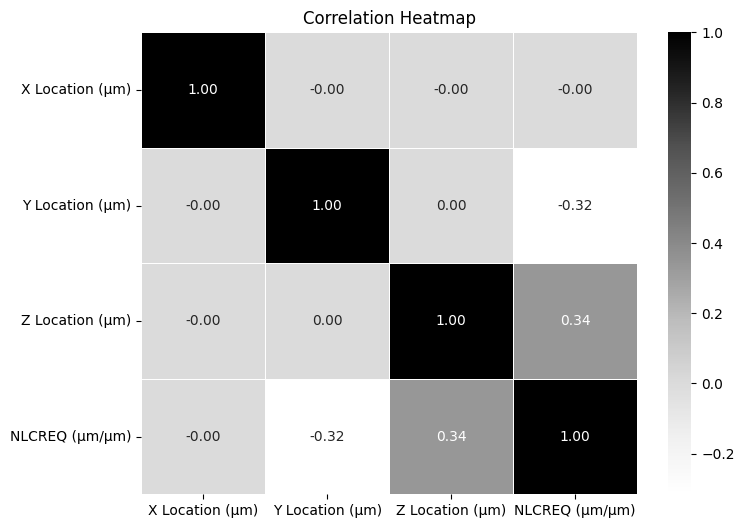

In [33]:
# Calculate the correlation matrix
corr_matrix = df[['X Location (µm)', 'Y Location (µm)', 'Z Location (µm)', 'NLCREQ (µm/µm)']].corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt='.2f', linewidths=0.5, cbar=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

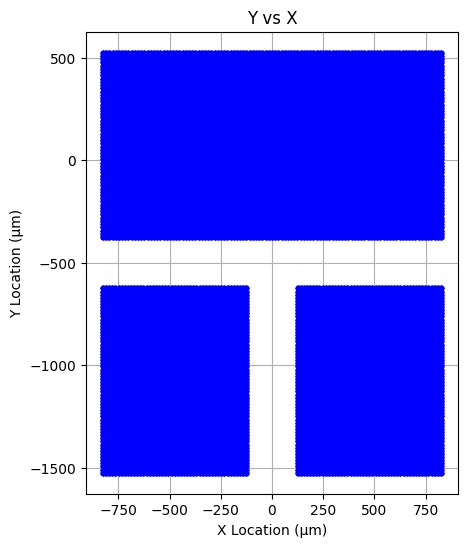

In [34]:
# Plot X and Y
plt.figure(figsize=(8, 6))
plt.plot(X_Location, Y_Location, 'bo', markersize=3)
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Y vs X')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
# plt.show()

In [35]:
grouped_data =  df.groupby(["X Location (µm)","Y Location (µm)"], sort=True, as_index=False)
grouped_data.head()

,X Location (µm),Y Location (µm),Z Location (µm),NLCREQ (µm/µm)
0,-809.52,-1509.5,-669.96,0.111030
1,-809.52,-1509.5,-684.96,0.039228
2,-809.52,-1509.5,-699.96,0.091925
3,-809.52,-1509.5,-714.96,0.373020
4,-794.32,-1509.5,-669.96,0.104670
...,...,...,...,...
71026,748.70,-1525.0,-714.93,0.370110
71027,763.91,-1525.0,-714.93,0.377730
71028,779.11,-1525.0,-714.93,0.390940
71029,794.32,-1525.0,-714.93,0.410000


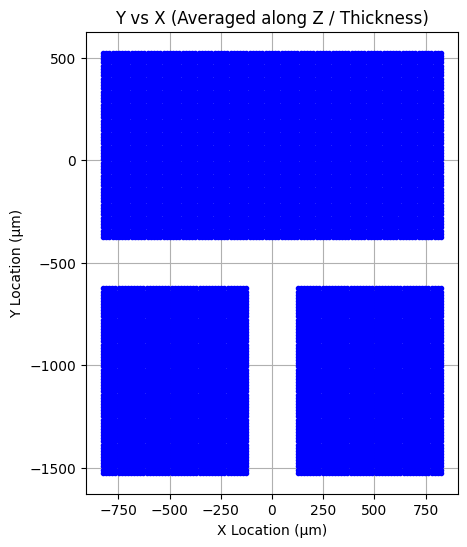

,index,X Location (µm),Y Location (µm),NLCREQ (µm/µm)
0,0,-825.0,-1525.0,0.1965
1,1,-825.0,-1509.5,0.1650
2,2,-825.0,-1494.3,0.1649
3,3,-825.0,-1479.0,0.1769
4,4,-825.0,-1463.8,0.1768


In [36]:
# Group by X and Y Location and calculate the mean of NLREQ
grouped_data =  df.groupby(["X Location (µm)","Y Location (µm)"], sort=True, as_index=False)['NLCREQ (µm/µm)'].mean()

# Round 'NLCREQ' values to 4 decimal places
grouped_data['NLCREQ (µm/µm)'] = grouped_data['NLCREQ (µm/µm)'].round(4)

# Reset index to make X and Y Location columns again
grouped_data.reset_index(inplace=True)

# Plot X and Y
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'], 'bo', markersize=3)
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Y vs X (Averaged along Z / Thickness)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
grouped_data.head()

In [37]:
len(X_Location), len(Y_Location), len(NLCREQ)

(71076, 71076, 71076)

In [38]:
# # Drop index before saving if present
# grouped_data = grouped_data.reset_index(drop=True)

# # Save grouped data to a text file without index
# grouped_data.to_csv(r'D:\THI_work\Journal\All_export_2D_grid_all_check\simulation_sac105_without_copper_non_linear\cree\top_avg_21660.txt', index=False, sep='\t', encoding='utf-8')

NLCREQ (µm/µm)
0.0121    1
0.0122    2
0.0124    1
0.0125    5
0.0126    2
         ..
0.1784    2
0.1785    2
0.1788    2
0.1789    2
0.1965    2
Name: count, Length: 1521, dtype: int64


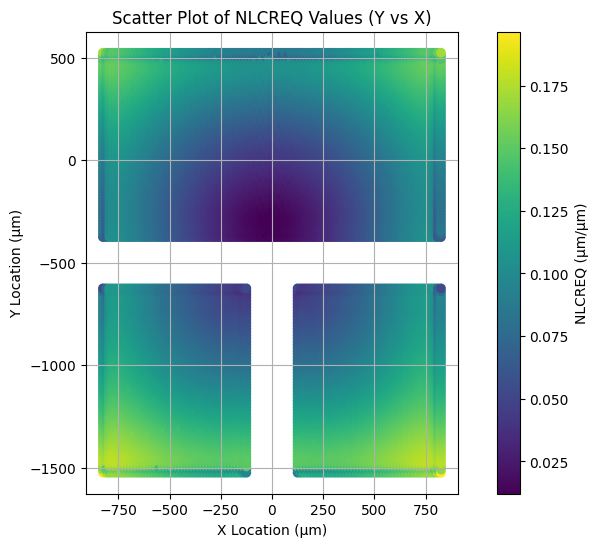

In [39]:
import matplotlib.pyplot as plt

print(grouped_data['NLCREQ (µm/µm)'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sc = plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis')  # viridis is a good colormap for continuous data
plt.colorbar(sc, label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Scatter Plot of NLCREQ Values (Y vs X)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


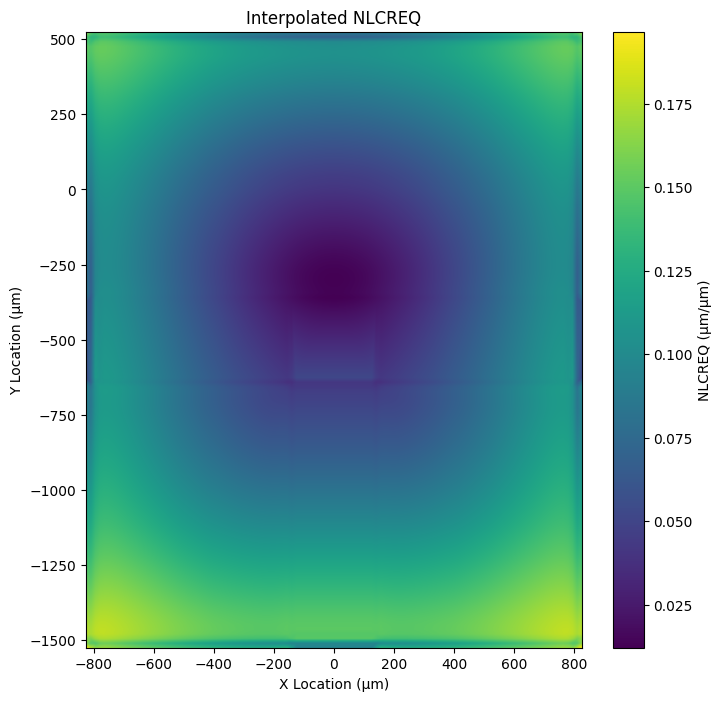

In [40]:
# Perform linear interpolation of NLCREQ values onto XY coordinate grid
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define grid dimensions
grid_size = 2000

# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], (X, Y), method='linear')

# Plot interpolated data
plt.figure(figsize=(8,8))
plt.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
plt.colorbar(label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
# plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Interpolated NLCREQ')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.show()

## Extra work cells

C:\Users\rupap\AppData\Local\Temp\ipykernel_23612\3536834793.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


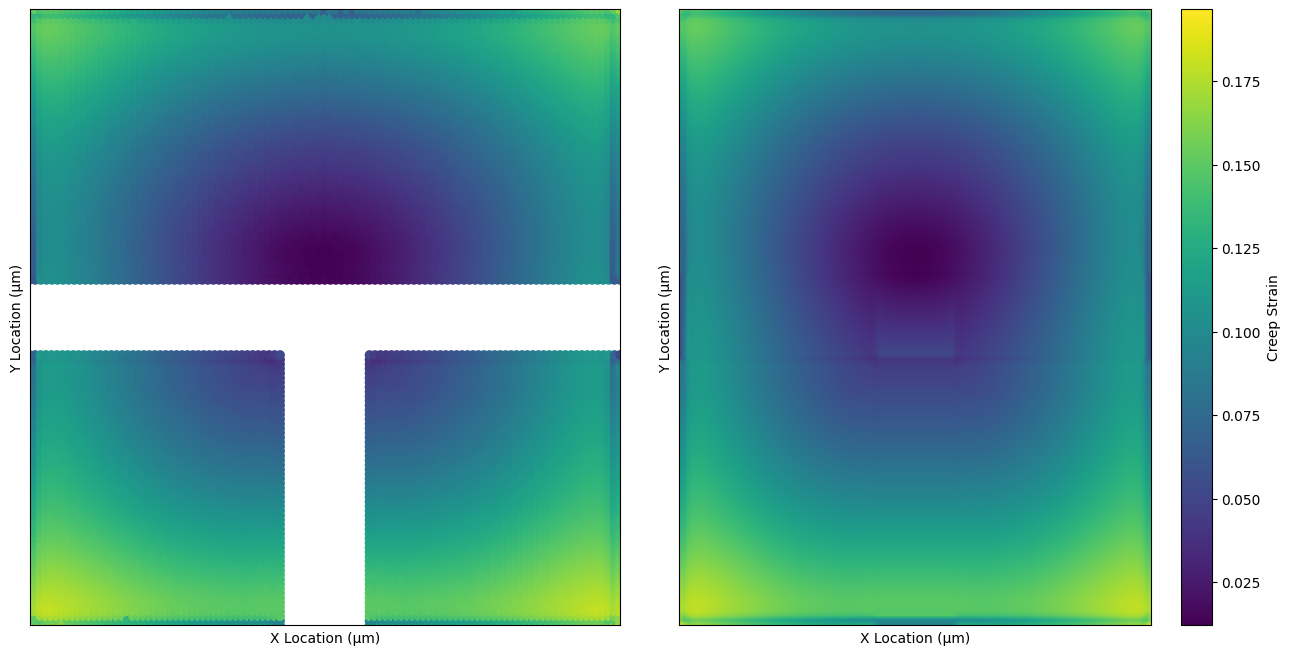

In [41]:
# Make above both graphs on same axis - side by side, both interpolated

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming 'grouped_data' is your DataFrame with the columns 'X Location (µm)', 'Y Location (µm)', and 'NLCREQ (µm/µm)'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.10})  # Added space between plots

# Define grid dimensions
grid_size = 5000



# First plot: Scatter plot
sc = ax1.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis')  # viridis is a good colormap for continuous data
# Removed the colorbar for the scatter plot
ax1.set_xlabel('X Location (µm)')
ax1.set_ylabel('Y Location (µm)')
# ax1.invert_yaxis()  # Invert the y-axis
ax1.grid(False)

# Remove axis numbers (ticks)
ax1.set_xticks([])
ax1.set_yticks([])



# Second plot: Interpolated heatmap
# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values linearly onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], 
                         (X, Y), 
                         method='linear')

im = ax2.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
cb2 = plt.colorbar(im, ax=ax2, label='Creep Strain')
ax2.set_xlabel('X Location (µm)')
ax2.set_ylabel('Y Location (µm)')
# ax2.invert_yaxis()  # Invert the y-axis
ax2.grid(False)

# Remove axis numbers (ticks)
ax2.set_xticks([])
ax2.set_yticks([])



# Set same scale for scatter plot
ax1.set_xlim(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']))
ax1.set_ylim(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']))

# Adjust layout
# plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


C:\Users\rupap\AppData\Local\Temp\ipykernel_23612\3858718506.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


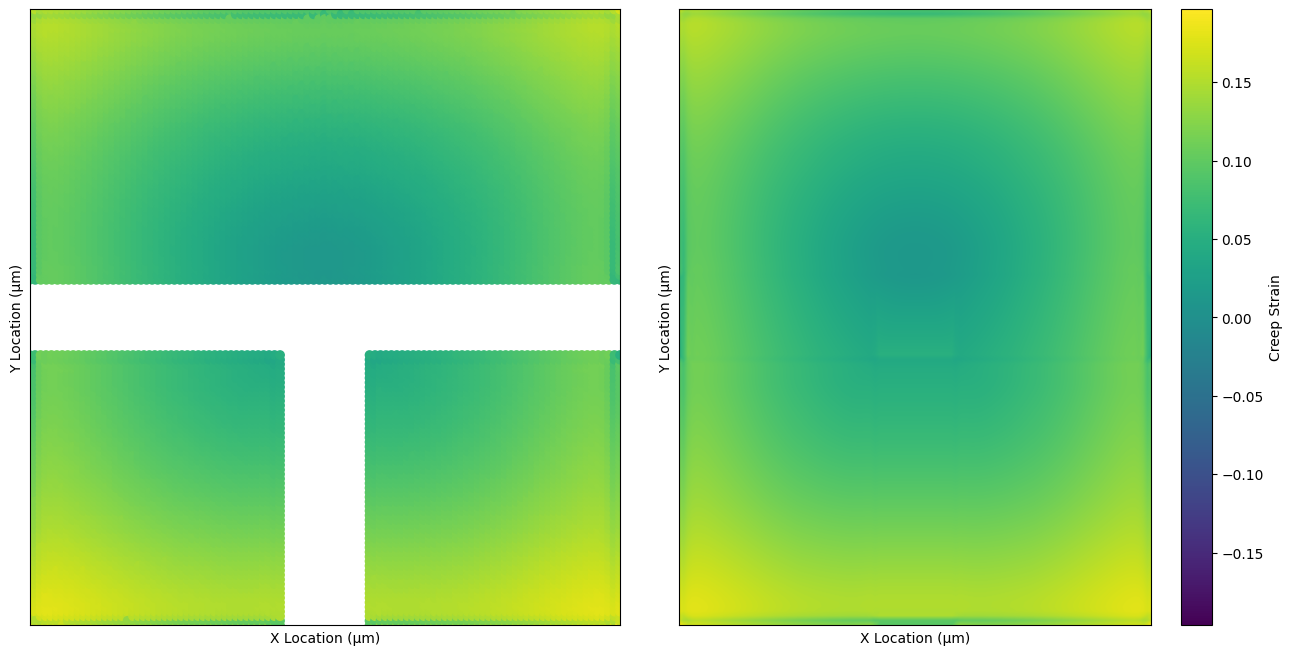

In [42]:
# Same as above but with symmetrical color limits

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming 'grouped_data' is your DataFrame with the columns 'X Location (µm)', 'Y Location (µm)', and 'NLCREQ (µm/µm)'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.10})  # Added space between plots

# Define grid dimensions
grid_size = 5000

# Determine symmetrical color limits
vmin = min(grouped_data['NLCREQ (µm/µm)'])
vmax = max(grouped_data['NLCREQ (µm/µm)'])
max_abs = max(abs(vmin), abs(vmax))



# First plot: Scatter plot
sc = ax1.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=-max_abs, vmax=max_abs)  # symmetrically set color limits
# Removed the colorbar for the scatter plot
ax1.set_xlabel('X Location (µm)')
ax1.set_ylabel('Y Location (µm)')
# ax1.invert_yaxis()  # Invert the y-axis
ax1.grid(False)

# Remove axis numbers (ticks)
ax1.set_xticks([])
ax1.set_yticks([])



# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], (X, Y), method='linear')




# Set same scale for scatter plot
ax1.set_xlim(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']))
ax1.set_ylim(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']))

# Second plot: Interpolated heatmap
im = ax2.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis',  # Color map; you can change this according to your preference
    vmin=-max_abs, vmax=max_abs  # symmetrically set color limits
)
cb2 = plt.colorbar(im, ax=ax2, label='Creep Strain')
ax2.set_xlabel('X Location (µm)')
ax2.set_ylabel('Y Location (µm)')
# ax2.invert_yaxis()  # Invert the y-axis
ax2.grid(False)

# Remove axis numbers (ticks)
ax2.set_xticks([])
ax2.set_yticks([])



# # Set same scale for heatmap
# ax2.set_xlim(y_vals.min(), y_vals.max())
# ax2.set_ylim(x_vals.min(), x_vals.max())

# Adjust layout
plt.tight_layout()
plt.show()

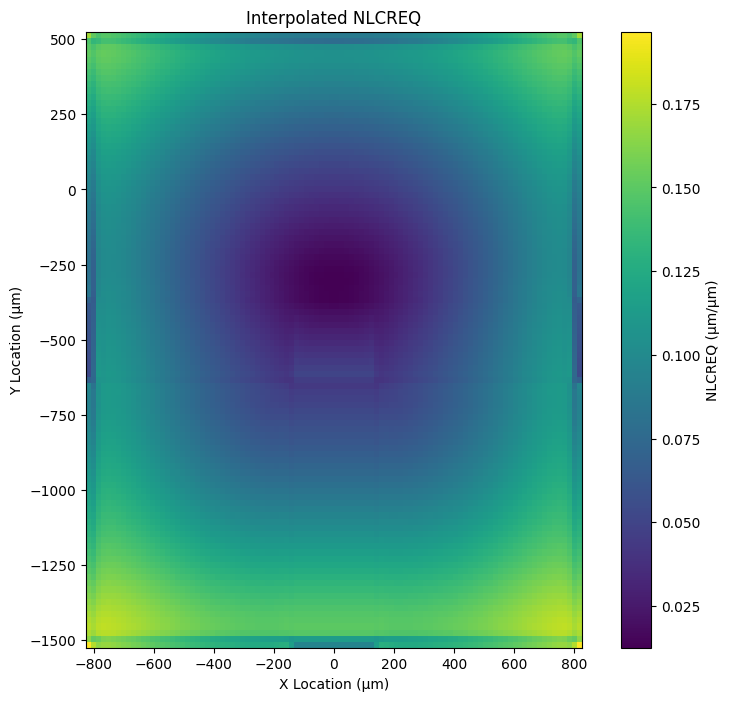

In [ ]:
# create second plot but with small grid size

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Group the data by X and Y location and calculate the mean of NLCREQ
grouped_data = df.groupby(['X Location (µm)', 'Y Location (µm)']).agg({'NLCREQ (µm/µm)': 'mean'}).reset_index()

# Define the grid size and create grid points for interpolation
grid_size = 100

x_vals = np.linspace(grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max(), grid_size)
y_vals = np.linspace(grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max(), grid_size)

# Create a meshgrid for X and Y coordinates
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate the NLCREQ values onto the grid
NLCREQ_interp = griddata(
    (grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']),
    grouped_data['NLCREQ (µm/µm)'],
    (X, Y),
    method='linear'  # You can change to 'cubic' for smoother interpolation
)

# Plot the interpolated data
plt.figure(figsize=(10, 8))
plt.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
plt.colorbar(label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Interpolated NLCREQ')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)  # Turn off the grid for a cleaner look
plt.show()


# Read all the files and automate the process of averaging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# Set display options
pd.set_option('display.width', None)  # Use None to try to display everything on one line
pd.set_option('display.max_colwidth', None)  # Ensure full width of columns if possible

In [131]:
# path to the .npy file
# file_path = r'D:\THI_work\Journal\All_export_2D_grid_all_check _current\simulation_sac105_without_copper_non_linear\cree\Top_21660.txt'
file_path = r'..\OneDrive_2025-03-03\LED_data_for prediction\Dataset\Data_preprocessing_2D_CNN\Data_All\Data\SAC105\FCGB1_sac105.npy'

resized_dim = (300, 300)

## Load the numpy array and save the interpolated greyscale image

In [ ]:
# Define the grid size for interpolation grid
# grid_size = 15000
grid_size = 1000

# path to the directory to save the images
folder_image_path = r'.\images'

greyscale_image_save_path = os.path.join(folder_image_path, f'grayscale_{os.path.basename(file_path)[:-4]}_{grid_size}x{grid_size}.png')


### Load the numpy array from the file_path and create dataframe from it

In [3]:
try:
    arr = np.load(file_path)
    df = pd.DataFrame(arr, columns=['X Location (µm)', 'Y Location (µm)', 'Z Location (µm)', 'NLCREQ (µm/µm)'])
    
    # Extract each column into separate variables
    X_Location = df['X Location (µm)']
    Y_Location = df['Y Location (µm)']
    Z_Location = df['Z Location (µm)']
    NLCREQ = df['NLCREQ (µm/µm)']
    
    print("X Location:", X_Location.shape)
    print("Y Location:", Y_Location.shape)
    print("Z Location:", Z_Location.shape)
    print("NLCREQ:", NLCREQ.shape)
    
except Exception as e:
    print("Failed to read the file:", e)

X Location: (71076,)
Y Location: (71076,)
Z Location: (71076,)
NLCREQ: (71076,)


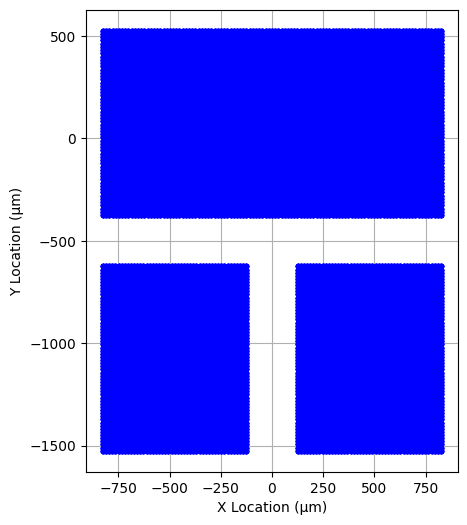

In [4]:
# Plot XY plane
plt.figure(figsize=(8, 6))
plt.plot(X_Location, Y_Location, 'bo', markersize=3)
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
# plt.title('Y vs X')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
# plt.show()

### XY (NLCREQ averaged)

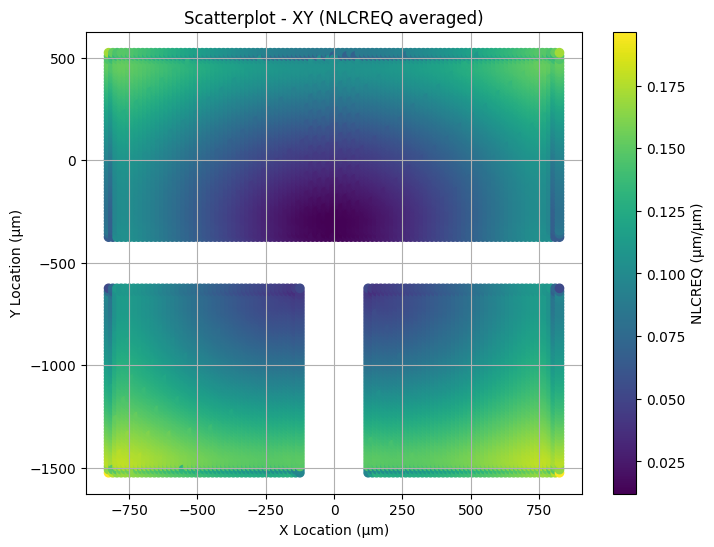

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Group by X and Y Location and calculate the mean of NLREQ
grouped_data = df.groupby(['X Location (µm)', 'Y Location (µm)'])['NLCREQ (µm/µm)'].mean().reset_index()

# Round 'NLCREQ' values to 4 decimal places
grouped_data['NLCREQ (µm/µm)'] = grouped_data['NLCREQ (µm/µm)'].round(4)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
            c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis')
plt.colorbar(label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
# plt.gca().invert_yaxis()

plt.title('Scatterplot - XY (NLCREQ averaged)')
plt.grid(True)
plt.show()

Interpolating FCGB1_sac105.npy file...


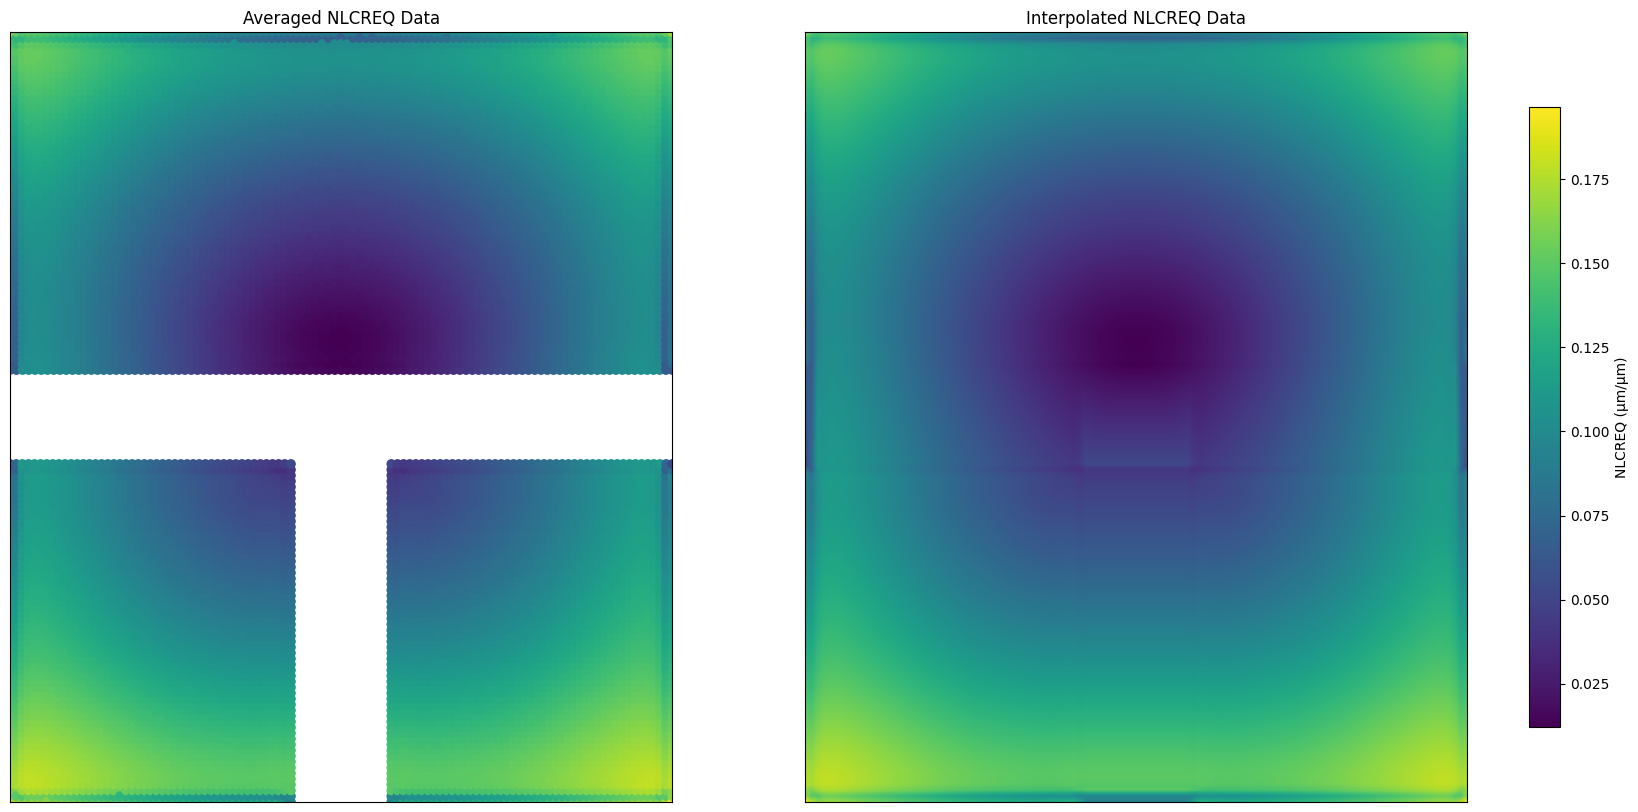

In [6]:
from scipy.interpolate import griddata
from PIL import Image


# Print the message
print(f"Interpolating {os.path.basename(file_path)} file...")



# Plotting the Averaged data and interpolated data side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Get the min and max for setting the same scale
x_min, x_max = grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max()
y_min, y_max = grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max()
nlcreq_min, nlcreq_max = grouped_data['NLCREQ (µm/µm)'].min(), grouped_data['NLCREQ (µm/µm)'].max()



# Averaged data plot
axes[0].scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max)
axes[0].set_title('Averaged NLCREQ Data')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)



# Interpolated data plot
# Define grid points based on the current file's data
x_vals = np.linspace(grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max(), grid_size)
y_vals = np.linspace(grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max(), grid_size)
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']),
                            grouped_data['NLCREQ (µm/µm)'], (X, Y), method='linear')

img = axes[1].imshow(NLCREQ_interp,
                        extent=(x_min, x_max, y_min, y_max),
                        origin='lower',
                        aspect='auto',
                        cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max)
axes[1].set_title('Interpolated NLCREQ Data')
axes[1].set_xticks([])
axes[1].set_yticks([])
# axes[1].invert_yaxis()  # Invert the y-axis

# Add a colorbar to the right side of the plots
fig.colorbar(img, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='NLCREQ (µm/µm)')

# Display the plots
plt.show()

### Save the interpolated data as greyscale image

In [7]:
# Normalise NLCREQ dimension and save it as grayscale image of the interpolated data

# handle nans and infinites in the array
NLCREQ_interp = np.nan_to_num(NLCREQ_interp)  # Replace NaNs and infinities with 0 and max int

# convert third dimension as grey scale
normalized_max = np.max(NLCREQ_interp)
if normalized_max == 0:
	normalized_img = np.zeros_like(NLCREQ_interp, dtype=np.uint8)
else:
	normalized_img = (NLCREQ_interp / normalized_max * 255).astype(np.uint8)

# save image using Matplotlib library
plt.imsave(greyscale_image_save_path, normalized_img, cmap='grey', format='png', dpi=600)
print(f"Image saved: {greyscale_image_save_path}")

Image saved: .\images\grayscale_FCGB1_sac105_1000x1000.png


## Load the greyscale image, resize and apply mask

### Load the image and resize it

In [264]:
import cv2

mask_for_image_path = greyscale_image_save_path

# mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCGB1_sac105_15000x15000.png'
# mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCGB2_sac105_15000x15000.png'
# mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCGB3_sac105_15000x15000.png'
# mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCSP2_sac105_15000x15000.png'
# mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCSP3_sac105_15000x15000.png'
mask_for_image_path = '.\images 15000x15000\SAC105\grayscale_FCSP4_sac105_15000x15000.png'


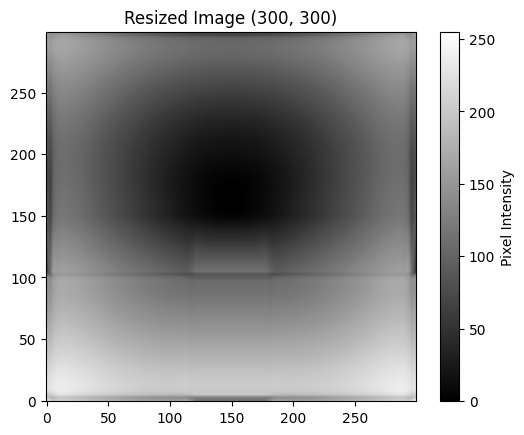

In [265]:
# Load the image
image = cv2.imread(mask_for_image_path, cv2.IMREAD_GRAYSCALE)  # Load as greyscale image	

# Resize the image to resized_dim(=300x300) pixels
resized_image = cv2.resize(image, resized_dim)



# Plot the resized image using matplotlib
plt.imshow(resized_image, cmap='gray', vmin=0, vmax=255)
plt.title(f"Resized Image {resized_dim}")
plt.colorbar(label='Pixel Intensity')
plt.axis('on')  # Show the axis
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

In [296]:
# Convert the resized image (which is a 2D array) to a DataFrame
# Create x, y coordinates
height, width = image.shape
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))

# Flatten the coordinates and intensities
x_coords = x_coords.flatten()
y_coords = y_coords.flatten()
intensities = image.flatten()

resized_image_df = pd.DataFrame({
    'X Location (µm)': x_coords,
    'Y Location (µm)': y_coords,
    'NLCREQ (µm/µm)': intensities
})

In [297]:
resized_image_df.head()

,X Location (µm),Y Location (µm),NLCREQ (µm/µm)
0,0,0,255
1,1,0,254
2,2,0,254
3,3,0,254
4,4,0,254


In [ ]:
import numpy as np
import pandas as pd

# Convert the resized image (which is a 2D array) to a DataFrame
# Create x, y coordinates
height, width = image.shape
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))

# Flatten the coordinates and intensities
x_coords = x_coords.flatten()
y_coords = y_coords.flatten()
intensities = image.flatten()

# Create DataFrame with x, y, and intensity
image_df = pd.DataFrame({
    'X Location (µm)': x_coords,
    'Y Location (µm)': y_coords,
    'NLCREQ (µm/µm)': intensities
})

print(image_df.head())


### Create masks of resized image size

#### Find first ractangle part of the mask

In [284]:
from scipy.interpolate import griddata
from PIL import Image
from matplotlib.patches import Rectangle

# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max
                            )
plt.title('XY Plan')

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [267]:
min_x = grouped_data['X Location (µm)'].min()
max_x = grouped_data['X Location (µm)'].max()

min_y = grouped_data['Y Location (µm)'].min()
max_y = grouped_data['Y Location (µm)'].max()


(grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max(),
grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max())

(np.float64(-825.0), np.float64(825.0), np.float64(-1525.0), np.float64(525.0))

In [268]:
# find top left coord of first rectangle

# Step 1: Find the minimum 'X Location (µm)' value
min_x

# Step 2: Filter the data where 'X Location (µm)' is equal to the minimum value
filtered_data = grouped_data[grouped_data['X Location (µm)'] == min_x]

# Step 3: Sort the filtered data by 'Y Location (µm)'
sorted_filtered_data = filtered_data.sort_values(by='Y Location (µm)')

# Step 4: Add a new column that contains the difference in 'Y Location (µm)' from the next point
sorted_filtered_data['Diff'] = sorted_filtered_data['Y Location (µm)'].diff().shift(-1)

# Step 5: Find the points with the highest difference in 'Y Location (µm)'
max_diff_row_idx = sorted_filtered_data['Diff'].idxmax()

In [269]:
max_diff_row_idx

np.int64(59)

In [270]:
# Get the two points with the maximum difference in 'Y Location (µm)'
point_1 = sorted_filtered_data.iloc[max_diff_row_idx]
point_2 = sorted_filtered_data.iloc[max_diff_row_idx + 1]

# Print the points
point_1, point_2, sorted_filtered_data.iloc[max_diff_row_idx]['Diff']

(X Location (µm)   -825.0000
 Y Location (µm)   -625.0000
 NLCREQ (µm/µm)       0.0532
 Diff               250.0000
 Name: 59, dtype: float64,
 X Location (µm)   -825.0000
 Y Location (µm)   -375.0000
 NLCREQ (µm/µm)       0.0644
 Diff                16.1400
 Name: 60, dtype: float64,
 np.float64(250.0))

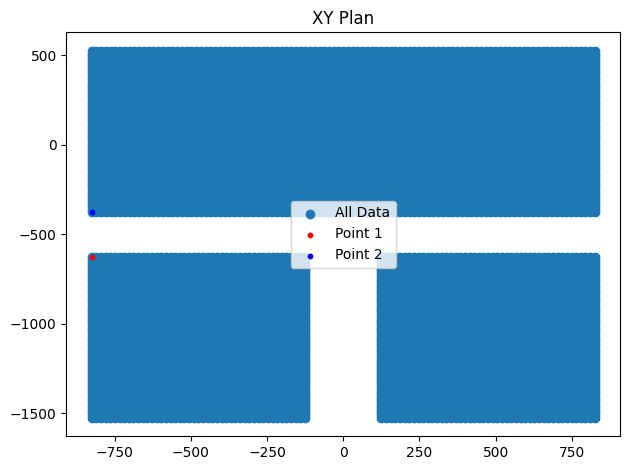

In [271]:
# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max,
                            label='All Data')

# Highlight the specific point
plt.scatter(point_1['X Location (µm)'], point_1['Y Location (µm)'],
            color='red', s=10, label='Point 1')  # s controls marker size
plt.scatter(point_2['X Location (µm)'], point_2['Y Location (µm)'],
            color='blue', s=10, label='Point 2')  # s controls marker size

plt.title('XY Plan')
plt.legend()
plt.tight_layout()

plt.show()
plt.close()

In [272]:
rectangle_1 = [point_2['X Location (µm)'], point_2['Y Location (µm)'], max_x, point_1['Y Location (µm)']]

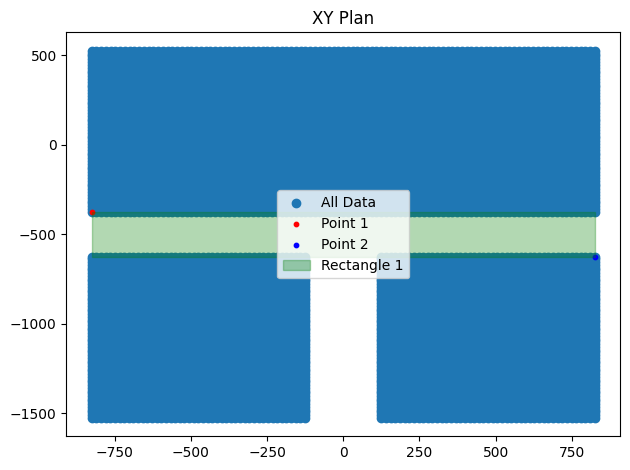

In [273]:
# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max,
                            label='All Data')

# Highlight the specific point
plt.scatter(rectangle_1[0], rectangle_1[1],
            color='red', s=10, label='Point 1')  # s controls marker size
plt.scatter(rectangle_1[2], rectangle_1[3],
            color='blue', s=10, label='Point 2')  # s controls marker size


# Add transparent rectangle
# Define rectangle coordinates
x_start = rectangle_1[0]
y_start = rectangle_1[1]
width = rectangle_1[2] - x_start
height = rectangle_1[3] - y_start
# add the patch to the plot
rect = Rectangle((x_start, y_start), width, height,
                 edgecolor='green', facecolor='green', alpha=0.3, label='Rectangle 1')
plt.gca().add_patch(rect)


plt.title('XY Plan')
plt.legend()
plt.tight_layout()

plt.show()
plt.close()

#### Second first ractangle part of the mask

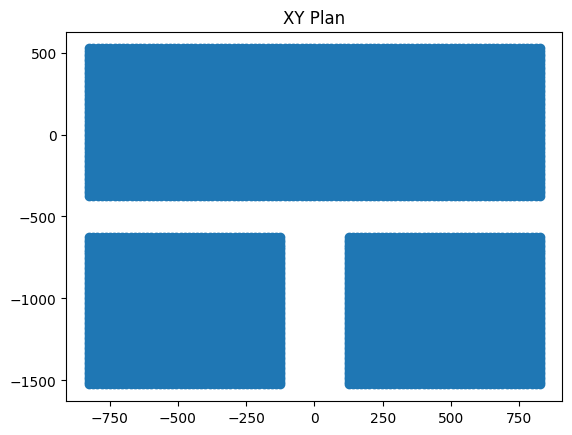

In [274]:
from scipy.interpolate import griddata
from PIL import Image
from matplotlib.patches import Rectangle

# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max
                            )
plt.title('XY Plan')

plt.show()

In [275]:
min_x = grouped_data['X Location (µm)'].min()
max_x = grouped_data['X Location (µm)'].max()

min_y = grouped_data['Y Location (µm)'].min()
max_y = grouped_data['Y Location (µm)'].max()


(grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max(),
grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max())

(np.float64(-825.0), np.float64(825.0), np.float64(-1525.0), np.float64(525.0))

In [276]:
# Filter the data where 'Y Location (µm)' is equal to the minimum value
filtered_data = grouped_data[grouped_data['Y Location (µm)'] == min_y]

# Sort the filtered data by 'X Location (µm)'
sorted_filtered_data = filtered_data.sort_values(by='X Location (µm)').reset_index(drop=True)

# Add a new column that contains the difference in 'X Location (µm)' from the next point
sorted_filtered_data['Diff'] = sorted_filtered_data['X Location (µm)'].diff().shift(-1)

# Find the points with the highest difference in 'Y Location (µm)'
max_diff_row_idx = sorted_filtered_data['Diff'].idxmax()

In [277]:
sorted_filtered_data, max_diff_row_idx

(    X Location (µm)  Y Location (µm)  NLCREQ (µm/µm)   Diff
 0           -825.00          -1525.0          0.1965  15.48
 1           -809.52          -1525.0          0.1762  15.20
 2           -794.32          -1525.0          0.1647  15.21
 3           -779.11          -1525.0          0.1673  15.20
 4           -763.91          -1525.0          0.1678  15.21
 ..              ...              ...             ...    ...
 89           763.91          -1525.0          0.1678  15.20
 90           779.11          -1525.0          0.1673  15.21
 91           794.32          -1525.0          0.1647  15.20
 92           809.52          -1525.0          0.1762  15.48
 93           825.00          -1525.0          0.1965    NaN
 
 [94 rows x 4 columns],
 46)

In [278]:
# Get the two points with the maximum difference in 'X Location (µm)'
point_3 = sorted_filtered_data.iloc[max_diff_row_idx]
point_4 = sorted_filtered_data.iloc[max_diff_row_idx + 1]

# Print the points
point_3, point_4, sorted_filtered_data.iloc[max_diff_row_idx]['Diff']

(X Location (µm)    -125.0000
 Y Location (µm)   -1525.0000
 NLCREQ (µm/µm)        0.0952
 Diff                250.0000
 Name: 46, dtype: float64,
 X Location (µm)     125.0000
 Y Location (µm)   -1525.0000
 NLCREQ (µm/µm)        0.0952
 Diff                 15.4700
 Name: 47, dtype: float64,
 np.float64(250.0))

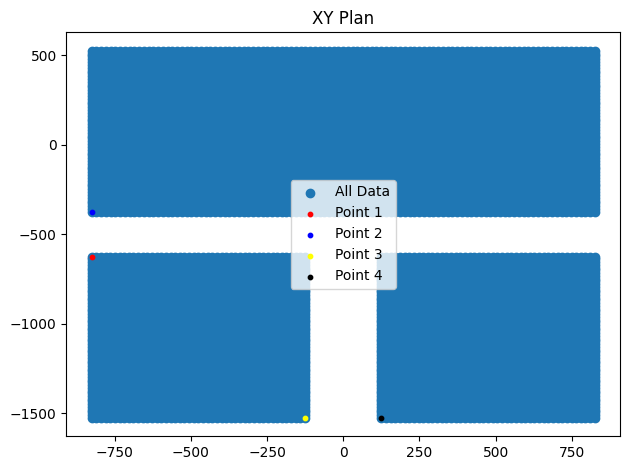

In [279]:
# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max,
                            label='All Data')

# Highlight the specific point
plt.scatter(point_1['X Location (µm)'], point_1['Y Location (µm)'],
            color='red', s=10, label='Point 1')  # s controls marker size
plt.scatter(point_2['X Location (µm)'], point_2['Y Location (µm)'],
            color='blue', s=10, label='Point 2')  # s controls marker size
plt.scatter(point_3['X Location (µm)'], point_3['Y Location (µm)'],
            color='yellow', s=10, label='Point 3')  # s controls marker size
plt.scatter(point_4['X Location (µm)'], point_4['Y Location (µm)'],
            color='black', s=10, label='Point 4')  # s controls marker size

plt.title('XY Plan')
plt.legend(loc='center')
plt.tight_layout()

plt.show()
plt.close()

In [280]:
rectangle_2 = [point_3['X Location (µm)'], point_1['Y Location (µm)'], point_4['X Location (µm)'], point_4['Y Location (µm)']]

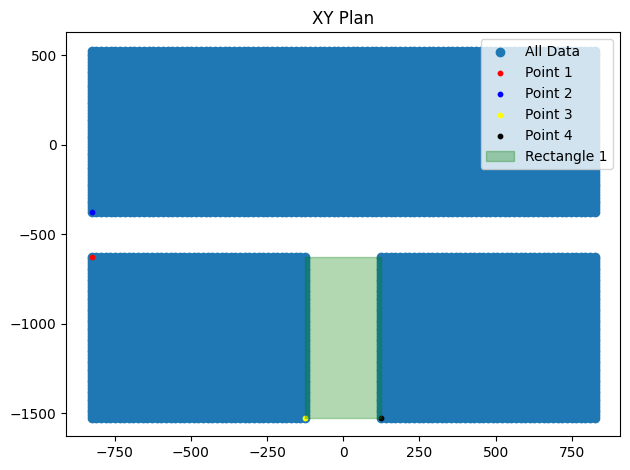

In [281]:
# Averaged data plot
plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                            # c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=nlcreq_min, vmax=nlcreq_max,
                            label='All Data')

# Highlight the specific point
plt.scatter(point_1['X Location (µm)'], point_1['Y Location (µm)'],
            color='red', s=10, label='Point 1')  # s controls marker size
plt.scatter(point_2['X Location (µm)'], point_2['Y Location (µm)'],
            color='blue', s=10, label='Point 2')  # s controls marker size
plt.scatter(point_3['X Location (µm)'], point_3['Y Location (µm)'],
            color='yellow', s=10, label='Point 3')  # s controls marker size
plt.scatter(point_4['X Location (µm)'], point_4['Y Location (µm)'],
            color='black', s=10, label='Point 4')  # s controls marker size

# Add transparent rectangle
# Define rectangle coordinates
x_start = rectangle_2[0]
y_start = rectangle_2[1]
width = rectangle_2[2] - x_start
height = rectangle_2[3] - y_start
# add the patch to the plot
rect = Rectangle((x_start, y_start), width, height,
                 edgecolor='green', facecolor='green', alpha=0.3, label='Rectangle 1')
plt.gca().add_patch(rect)


plt.title('XY Plan')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()
plt.close()

In [282]:
print(f"'{os.path.basename(mask_for_image_path)[10:-23]}_mask': [")
for rect in [rectangle_1, rectangle_2]:
    print(f"\t{rect},")
print("],")


'FCSP4_mask': [
	[np.float64(-825.0), np.float64(-375.0), np.float64(825.0), np.float64(-625.0)],
	[np.float64(-125.0), np.float64(-625.0), np.float64(125.0), np.float64(-1525.0)],
],


In [283]:
os.path.basename(file_path)[:-11]

'FCGB1'

### Save the resized image with mask